<a href="https://colab.research.google.com/github/JeonJongDae/dinner_stock_AI/blob/main/pytorch_part3_dataset_dataloader_blank_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# pytorch part 3: 데이터셋Dataset과 데이터로더DataLoader

## pytorch에 미리 정의된 데이터셋 불러 오기

- FashionMNIST

In [28]:
# pytorch에서 미리 정의된 Dataset 로드, FashionMNIST
# ToTensor() 
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [29]:
# label 정의

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# of Train samples: 60000
# of Test samples: 10000
Sample shape: torch.Size([1, 28, 28]) label: 3


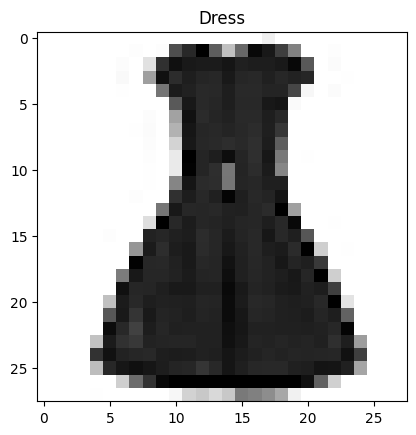

In [30]:
# data개수 확인
print("# of Train samples:", len(training_data))
print("# of Test samples:", len(test_data))

# data 확인
idx = np.random.choice(len(training_data), 1)
X, y = training_data[idx[0]]
print("Sample shape:", X.shape, "label:", y)

# 이미지 확인
fig = plt.figure()
ax = plt.axes()

ax.imshow(X.squeeze(), cmap='binary')
ax.set_title(labels_map[y])
plt.show()

## 사용자 정의 데이터셋 만들기

In [ ]:
# 만약 아래 파일 가져오기가 안되면 gdown을 다시 설치하고
# 런타임 다시시작 하고 나서 시도 
# https://github.com/wkentaro/gdown/issues/43
# !pip install --upgrade --no-cache-dir gdown

In [31]:
# 구글 드라이브에 저장된 fashion-mnist csv 파일 불러오기
# !gdown --id 1lo-tPwidDyA9uAOUbCkpHetwEuiBxcyp
!gdown  1lo-tPwidDyA9uAOUbCkpHetwEuiBxcyp
!unzip fashion-mnist-csv.zip

Downloading...
From: https://drive.google.com/uc?id=1lo-tPwidDyA9uAOUbCkpHetwEuiBxcyp
To: /content/fashion-mnist-csv.zip
100% 36.3M/36.3M [00:00<00:00, 76.8MB/s]
Archive:  fashion-mnist-csv.zip
replace fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fashion-mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [32]:
!ls -la

total 187080
drwxr-xr-x 1 root root      4096 Apr  1 05:43 .
drwxr-xr-x 1 root root      4096 Apr  1 05:18 ..
drwxr-xr-x 4 root root      4096 Mar 30 13:52 .config
drwxr-xr-x 3 root root      4096 Apr  1 05:22 data
-rw-r--r-- 1 root root  36315660 Apr  1 05:43 fashion-mnist-csv.zip
-rw-r--r-- 1 root root  22176691 Sep 21  2019 fashion-mnist_test.csv
-rw-r--r-- 1 root root 133047193 Sep 21  2019 fashion-mnist_train.csv
drwxr-xr-x 1 root root      4096 Mar 30 13:53 sample_data


In [33]:
nnnn# 이미지 파일 정보가 숫자로 csv파일에 적혀 있으므로 
# 판다스로 일단 한번 읽어오기 위해 판다스 임포트
import pandas as pd

In [34]:
img_labels = pd.read_csv('fashion-mnist_test.csv')

In [53]:
img_labels.shape

(10000, 785)

In [36]:
# 커스텀 데이터 셋 만들기[+]

class CustomImageDataset(Dataset):
    def __init__(self, csv, transform=None):
        self.data = pd.read_csv(csv).to_numpy()
        self.transform = transform

    def __len__(self):
        return self.data.shape(0)

    def __getitem__(self, idx):
        # return value assignment
        label = self.data[idx,0]
        image = self.data[idx,1:].reshape(28,28).astype(np.uint8)
        #image = self.data[idx, 1:].reshape(28, 28).astype(np.uint8)
        
        # transform
        if self.transform:
           image = self.transform(image)
        # return
        return image, label



In [58]:

class CustomImageDataset(Dataset):
    def __init__(self, csv, transform=None):
        self.data = pd.read_csv(csv).to_numpy()
        self.transform = transform

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        # return value assignment
        label = self.data[idx, 0]
        image = self.data[idx, 1:].reshape(28, 28).astype(np.uint8)
        
        # transform
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [59]:
# transform 없는 상태로 데이터셋 만들기
D_train = CustomImageDataset('fashion-mnist_train.csv')

In [60]:
len(D_train )

60000

<class 'numpy.ndarray'> uint8 (28, 28) 0 [  0   0   0   0   1   0   0   0   0  41 162 167  84  30  38  94 177 176
  26   0   0   0   1   0   0   0   0   0]


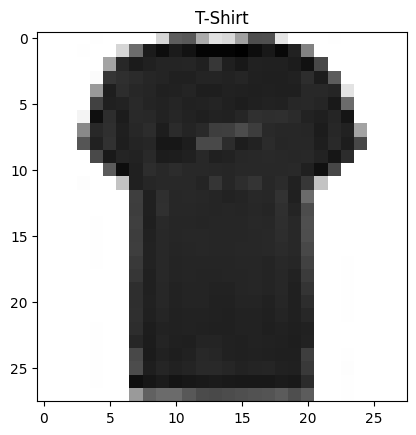

In [61]:
X, y = D_train[10]

# 데이터셋으로 부터 반환되는 데이터 X의 타입과 값 확인
print(type(X), X.dtype, X.shape, y, X[0])

# 이미지 확인
fig = plt.figure()
ax = plt.axes()

ax.imshow(X, cmap='binary')
ax.set_title(labels_map[y])
plt.show()


In [62]:
# transform이 있는 상태로 데이터셋 만들기[+]
D_train = CustomImageDataset('fashion-mnist_train.csv', transform=ToTensor())

<class 'torch.Tensor'> torch.float32 torch.Size([1, 28, 28]) 0 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
        0.1608, 0.6353, 0.6549, 0.3294, 0.1176, 0.1490, 0.3686, 0.6941, 0.6902,
        0.1020, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])


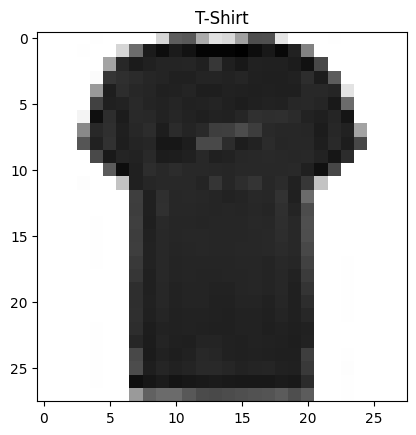

In [63]:
X, y = D_train[10]

# 데이터셋으로 부터 반환되는 데이터 X의 타입과 값 확인
# 이전 transform이 없는 상태로 만들었을 때와 주의깊게 비교
print(type(X), X.dtype, X.shape, y, X[0][0])

# 이미지 확인
fig = plt.figure()
ax = plt.axes()

ax.imshow(X.squeeze().numpy(), cmap='binary')

ax.set_title(labels_map[y])
plt.show()

# 이미지 증강Image Augmentation

In [64]:
# 다양한 transform
from torchvision import transforms

In [65]:
T = transforms.Compose([
    # ndarray->pillow image 아래쪽 flip을 수행하기 위해
    transforms.ToPILImage(),  
    transforms.RandomVerticalFlip(p=0.5),
    # normalize: uint8형이면 ToTensor()에서 0~255->0.~1.
    transforms.ToTensor(),
])

In [66]:
D_train = CustomImageDataset('fashion-mnist_train.csv', transform=T)

In [67]:
len(D_train)

60000

<class 'torch.Tensor'> torch.float32 torch.Size([1, 28, 28]) 0 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3961, 0.6157,
        0.5804, 0.5804, 0.6549, 0.7059, 0.7137, 0.7020, 0.6902, 0.6745, 0.6706,
        0.6431, 0.6941, 0.6392, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
        0.0000])


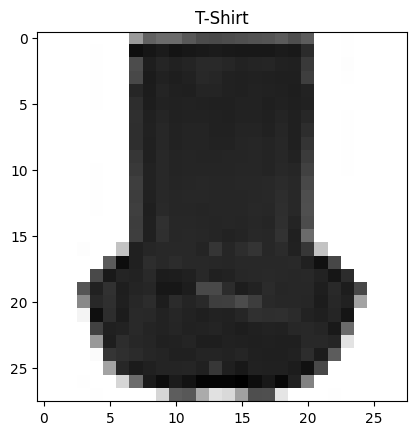

In [68]:
X, y = D_train[10]

print(type(X), X.dtype, X.shape, y, X[0][0])

# 이미지 확인
fig = plt.figure()
ax = plt.axes()

ax.imshow(X.squeeze().numpy(), cmap='binary')

ax.set_title(labels_map[y])
plt.show()

# 데이터로더DataLoader

In [69]:
# 데이터 로더 만들기[+]
train_loader = DataLoader(D_train, batch_size=64, shuffle=True)
train_loader_iter = iter(train_loader) 

sample shape: (5, 1, 28, 28)


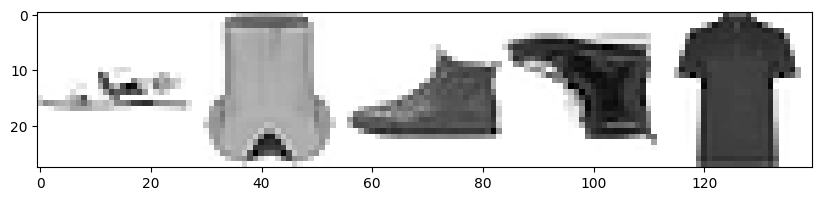

In [70]:
mini_batch = next(train_loader_iter)

# 5장만 그려보기
samples5 = mini_batch[0][:5].numpy()
print("sample shape:", samples5.shape)

images = samples5.squeeze().transpose(1,0,2).reshape(28,-1)

fig = plt.figure(figsize=(10,5))
ax = plt.axes()

ax.imshow(images, cmap='binary')
plt.show()

In [93]:
# 종합하여 test셋에대해서도 데이터 셋과 데이터 로더 만들기
D_test = CustomImageDataset('fashion-mnist_test.csv', transform=ToTensor())
test_loader = DataLoader(D_test, batch_size=100, shuffle=False)
test_loader_iter = iter(test_loader)

# 실습

- 만들어진 데이터 셋과 데이터로더를 이용해서 모델을 만들고 학습합니다.

- 학습에 필요한 세가지 보조 함수를 먼저 정의합니다.



## 보조함수들

### train 함수

- `train()`함수는 외부에서 정의된 `model`, `criterion`, `optimizer`, `epochs`를 인자로 받아 학습 루프를 구성합니다.

- 이 함수 내부에서 데이터로더를 `for`루프에 어떻게 사용하는지 확인할 수 있습니다.

In [72]:
# train function[+]
# 모델과 옵티마이저를 받아서 주어진 에폭만큼 학습시키는 함수
def train(model, criterion, optimizer, epochs):
    # 먼저 모델을 train모드로 설정
    model.train()

    # 주어진 에폭만큼 반복하면서(외부루프)
    for e in range(epochs):
        train_loss = 0.0

        # 데이터 셋 전체를 반복하면서(내부루프)
        # 학습 5단계를 수행한다.
        # 데이터 로더를 for문에 바로 적용하면 한번 반복에 지정된 배치 사이즈 만큼
        # 데이터를 반복해서 반환
        for i, (X_batched, y_batched) in enumerate(train_loader):
            # X_batched:(N,D), y_batched:(N,)
            
            # zerograd, inference, loss, backward, step
            optimizer.zero_grad()
            score = model(X_batched)
            loss = criterion(score, y_batched)
            loss.backward()
            optimizer.step()

            train_loss += loss
        
        # 한 에폭이 끝났으면 평균로스, 학습 정확도, 테스트 정확도 등을 구해서
        # 화면에 출력한다.
        # 단, 이때는 그래디언트 계산을 위한 계산 그래프를 추적할 필요가 없으므로
        # no_grad()를 설정한다.
        with torch.no_grad():
            avg_train_loss = train_loss / len(train_loader)
            
            print(f"EPOCH: {e}, AVG TRAIN LOSS: {avg_train_loss.item():.6f}")

### eval 함수

- 학습된 모델을 전달받아 테스트 셋에 대해 성능을 측정하는 함수입니다.

- 이 함수는 모델이 어떤 형식으로 출력을 되돌리냐에 따라 후속 코드가 다랄져야 합니다. 아래 코드를 보면
```python
score = model(X_batched)
softmax_score = torch.nn.functional.softmax(score, dim=-1)
y_pred = torch.argmax(softmax_score, dim=-1)
```

- 모델의 마지막 출력에 아무런 활성홤수를 취하지 않음을 가정하고 있기 때문에 온전한 출력을 만들어 테스트 하기 위해 직접 `softmax`함수와 `argmax`함수를 적용하고 있는 것을 알 수 있습니다.

- 만약 모델의 출력에 이미 `softmax`나 `logsoftmax`따위가 적용되어 있다면 이 부분이 달라져야 합니다.

- 아래 MLP 실습예제를 풀면서 이부분을 직접 연습해볼 수 있습니다.

In [73]:
# eval function[+]
# 학습된 모델을 넘겨 받아 테스트세트에 대해서 성능을 계산
def eval_model_linear(model):
    # 먼저 모델을 eval모드로 설정
    model.eval()

    corr = 0
    # 테스트로더에서 테스트 샘플을 받아와서 
    # 모델의 최종 출력과 적합하게 score를 계산한다.
    for i, (X_batched, y_batched) in enumerate(test_loader):
        # X_batched:(N,D), y_batched:(N,)
        
        # 모델의 마지막 출력은 linear층으로 부터 얻어진다고 가정
        # 그래서 이 함수의 이름 끝에 _linear가 있음
        score = model(X_batched)

        # linear로 출력된 결과에 다클래스 분류를 위해 softmax를 적용
        softmax_score = torch.nn.functional.softmax(score, dim=-1)

        # 다시 argmax를 적용해서 제일 큰 자리의 인덱스 값을 알아옴
        y_pred = torch.argmax(softmax_score, dim=-1)
        
        # 구해진 인덱스가 y_batched하고 같은지 검사
        # corr에는 같은 개수(맞춘 개수)가 합산됨
        corr += (y_pred == y_batched).sum()

    test_acc = corr.item()/len(D_test)
    print(f"Test Acc: {test_acc}")

### 샘플링 함수

- 이미지 몇장에 대한 예측을 하고 예측 결과를 그림으로 표시하는 보조함수

In [74]:
def sampling(model, mini_batch, num_samples):
    
    X_batched = mini_batch[0][:num_samples]
    y_batched = mini_batch[1][:num_samples]

    score = model(X_batched)
    softmax_score = torch.nn.functional.softmax(score, dim=-1)
    y_pred = torch.argmax(softmax_score, dim=-1)

    fig, ax = plt.subplots(figsize=(10,5), nrows=1, ncols=num_samples)

    for i in range(num_samples):
        ax[i].imshow(X_batched[i].squeeze(), cmap='binary')
        ax[i].set_title(f"{labels_map[y_batched[i].item()]}:{labels_map[y_pred[i].item()]}")

    plt.show()

## Softmax Regression

- 만들어진 Dataset, DataLoader로 Softmax 회귀 모델 작성합니다.

- 다음 명세를 지켜서 모델을 수립하고 학습시키세요.
    - Model: `Sequentail`
    - Optimizer: `SGD`
    - Loss: `CrossEntropyLoss`

$$
\ell(W) = - \sum_{i=1}^N \sum_{j=1}^C y_{ij} \log\left(\text{Softmax}\left(f\left(\mathbf{x}_{i}\right) \right)_j \right)
$$

- 위 식에서 $f\left(\mathbf{x}_{i}\right)$는 네트워크가 출력하는 스코어로 `CrossEntropyLoss` 손실 함수는 내부에서 소프트맥스와 로그를 취하기 때문에 모델은 `Linear()`로 끝나게 작성되어야 합니다.

In [76]:
# model define[+]
model = torch.nn.Sequential(
    torch.nn.Flatten(), # (28,28)인 이미지를 (784,)로 펼치기 위해 배치
    torch.nn.Linear(784,10) # Linear()를 배치
)

# forward test
# 이 부분의 실행결과가 임의의 숫자 10개가 출력되면 됨
X_batched, y_batched = next(train_loader_iter)
score = model(X_batched)
print('score.shape:', score.shape, score[0])


score.shape: torch.Size([64, 10]) tensor([-0.1707, -0.1915,  0.1047, -0.1111, -0.0257, -0.0952,  0.3247, -0.0148,
        -0.0909, -0.1710], grad_fn=<SelectBackward0>)


- 다음으로 손실 함수와 옵티마이저를 정의 합니다. 

In [78]:
# optimizer and loss[+]
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

- 보조함수에서 정의한 `train()`에 적당한 인자를 넘기면서 만들어진 모델을 학습 시킵니다.

- `train()`이 매 에폭마다 정확도를 계산해서 출력하지는 않지만 손실이 줄어드는 것을 확인할 수 있습니다. 이를 통해 학습이 제대로 진행되고 있는지 확인할 수 있습니다.

In [80]:
# train model 10 epochs run time: about 1 min.[+]
train(model, criterion, optimizer, 10)

EPOCH: 0, AVG TRAIN LOSS: 1.149011
EPOCH: 1, AVG TRAIN LOSS: 0.858189
EPOCH: 2, AVG TRAIN LOSS: 0.785062
EPOCH: 3, AVG TRAIN LOSS: 0.742562
EPOCH: 4, AVG TRAIN LOSS: 0.714431
EPOCH: 5, AVG TRAIN LOSS: 0.693225
EPOCH: 6, AVG TRAIN LOSS: 0.676817
EPOCH: 7, AVG TRAIN LOSS: 0.663532
EPOCH: 8, AVG TRAIN LOSS: 0.652252
EPOCH: 9, AVG TRAIN LOSS: 0.643096


- 모든 학습이 정상적으로 완료되었다면 아래 `eval_model_linear()`를 호출했을 때 0.7 후반대 정확도를 얻을 수 있습니다.

In [81]:
# evaluation model, about 0.78xx
eval_model_linear(model)

Test Acc: 0.7861


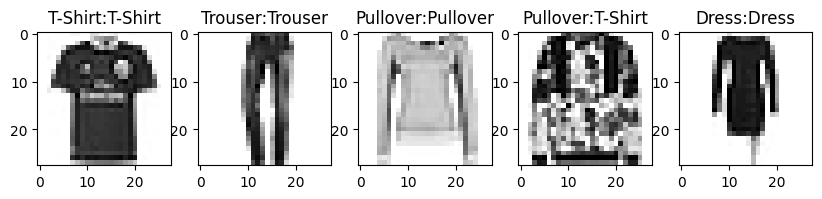

In [82]:
 # sampling
mini_batch = next(test_loader_iter)
sampling(model, mini_batch, 5)

## MLP


- 이 실습에서 로스 함수를 다양하게 변경해가면서 다층 모델을 구성하도록 하겠습니다.

- 모든 모델을 2 레이어 이상으로 구성하고 적절히 변형된 손실 함수와 `eval_model_*()` 코딩해야 합니다.



### NLLLoss
- 만들어진 Dataset, DataLoader로 MLP 모델을 작성합니다.

- 다음 명세를 지켜서 모델을 수립하고 학습시키세요.
    - Model: `Sequentail`
    - 레이어 활성함수: `ReLU`
    - Optimizer: `Adam`
    - Loss: `NLLLoss`

$$
\ell(W) = - \sum_{i=1}^N \sum_{j=1}^C y_{ij} \log\left(\text{Softmax}\left(f\left(\mathbf{x}_{i}\right) \right)_j \right)
$$

- 위 식에서 $f\left(\mathbf{x}_{i}\right)$는 네트워크가 출력하는 스코어로 `NLLLoss` 손실 함수는 내부에서 소프트맥스와 로그를 취하지 않기 때문에 모델은 `Linear()`로 끝나서는 안되며 part2의 소프트맥스 회귀 모델처럼 `LogSoftmax()`로 끝나게 작성되어야 합니다.


In [103]:
# model define
model = torch.nn.Sequential(
    ######################################
    # WRITE YOUR CDDE HERE[+]
    # 여기 적당히 멀티레이어 퍼셉트론 모델을 정의 하기
    # 마지막 레이어는 NLLLoss()를 쓸수 있게 구성해야 함
    torch.nn.Flatten(),
    torch.nn.Linear(784, 128), # 적당한 입력 크기와 출력 크기를 설정
    torch.nn.ReLU(),  # 레이어 활성 함수를 배치
    torch.nn.Linear(128, 10), # 적당한 입력 크기와 출력 크기를 설정
    torch.nn.LogSoftmax(dim=-1) # 마지막 레이어 활성 함수를 배치
    ######################################
)

# forward test
X_batched, y_batched = next(train_loader_iter)
score = model(X_batched)
print('score.shape:', score.shape)


score.shape: torch.Size([64, 10])


In [106]:
# optimizer and loss

######################################
# WRITE YOUR CDDE HERE[*]
# 실습 요구 사항에 맞게 로스와 옵티마이저를 초기화 하기
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [107]:
# train model run time: 1 min.

######################################
# WRITE YOUR CDDE HERE
# train함수를 epoch 5 로 실행하세요. 
train(model, criterion, optimizer, 5)

EPOCH: 0, AVG TRAIN LOSS: 0.615493
EPOCH: 1, AVG TRAIN LOSS: 0.507666
EPOCH: 2, AVG TRAIN LOSS: 0.479149
EPOCH: 3, AVG TRAIN LOSS: 0.463098
EPOCH: 4, AVG TRAIN LOSS: 0.458702


- 모델 출력이 `LogSoftmax()`로 바뀌었으므로 `eval_model_linear()`를 일부 수정해야 합니다.

- 아래 `eval_model_logsoftmax()`를 주석을 참고하여 완성하세요.

In [109]:
# eval function
def eval_model_logsoftmax(model):
    model.eval()

    corr = 0
    for i, (X_batched, y_batched) in enumerate(test_loader):
        score = model(X_batched)

        ######################################
        # WRITE YOUR CDDE HERE[*]
        #
        # model을 포워드 시키고 돌려 받은 결과를 
        # y_batched와 비교할 수 있는 형식으로 변경 하세요.
        # score에 이미 적용된 log를 벗겨서 softmax_score로 만드세요.
        softmax_score = torch.exp(score)

        # 변형된 결과를 y_pred에 저장하세요.
        # y_pred는 아래쪽 
        # corr += (y_pred == y_batched).sum() 
        # 이 올바르게 실행될 수 있게 구성되어야 합니다.
        y_pred = torch.argmax(softmax_score, dim=-1)
        ######################################

        # y_batched에는 test_loader가 정의될때 지정된 batch_size 만큼의
        # 샘플에 대한 정답 숫자가 들어 있음
        # (0, 1, 5, 0 , 7, 8, 9, 2, ...) 이런식...
        corr += (y_pred == y_batched).sum()

    test_acc = corr.item()/len(D_test)
    print(f"Test Acc: {test_acc}")

- 모든 학습이 정상적으로 완료되었다면 아래 `eval_model_logsoftmax()`를 호출했을 때 0.8 초중반대 정확도를 얻을 수 있어야 합니다.

- 만약 점수에 이에 미치지 못한다면 레이어의 구성을 바꿔보세요. 레이어를 더 추가 한다든지 레이어의 노드 수를 늘린다든지 다양한 시도가 필요할 수 있습니다.

In [112]:
# evaluation model, about 0.80~0.84

######################################
# WRITE YOUR CDDE HERE
# eval_model_logsoftmax()를 호출하기 전에 위쪽 함수 바디를 
# 완성하고 호출하세요.
eval_model_logsoftmax(model)

Test Acc: 0.8187


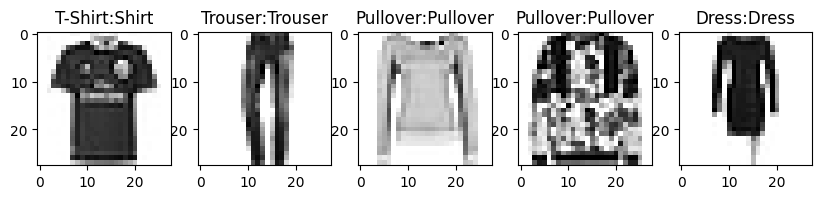

In [113]:
# sampling
mini_batch = next(test_loader_iter)
sampling(model, mini_batch, 5)

### BCELoss

-  다클래스 분류 문제를 BCELoss를 사용하여 풀기

- 다음 명세를 지켜서 모델을 수립하고 학습시키세요.
    - Model: `Sequentail`
    - 레이어 활성함수: `ReLU`
    - Optimizer: `Adam`
    - Loss: `BCELoss`

$$
L  = - \sum_{i=1}^N \sum_{j=1}^C y_{ij} \log \left( \text{Sigmoid}(f(\mathbf{x}_i))_j \right) + (1-y_{ij}) \log (1 - \text{Sigmoid}(f(\mathbf{x}_i))_j )
$$


- 위 식에서 $f\left(\mathbf{x}_{i}\right)$는 네트워크가 출력하는 스코어로 `BCELoss` 손실 함수는 내부에서 시그모이드를 취하지 않기 때문에 모델은 `Linear()`로 끝나서는 `Sigmoid()`로 끝나게 작성되어야 합니다.

In [115]:
# model define

model = torch.nn.Sequential(
    ###########################################################
    # WRITE YOUR CDDE HERE[*]
    # BCELoss()를 쓸경우 최종 출력 layer를 알맞게 코딩하세요.
    torch.nn.Flatten(),
    torch.nn.Linear(784, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 10),
    torch.nn.Sigmoid()
    ###########################################################
)


# forward test
X_batched, y_batched = next(train_loader_iter)
score = model(X_batched)
print('score.shape:', score.shape)

score.shape: torch.Size([64, 10])


- `torch.nn.BCELoss()` 손실함수는 정답 $y$와 모델의 출력 $\hat{y}$의 모양이 동일해야 에러없이 작동합니다.

- 즉 10 클래스가 있는 문제에서 5개 샘플에 대해서 정답 레이블이 다음과 같다면
```python 
y = [1, 3, 2, 0, 8]
```

- 이 정답 레이블은 다음처럼 원핫인코딩 되어어 `BCELoss()`에 입력되어야 합니다.
```
y_onehot = [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]
```

In [117]:
# train function
def train_with_bceloss(model, criterion, optimizer, epochs):
    model.train()

    for e in range(epochs):
        train_loss = 0.0

        for i, (X_batched, y_batched) in enumerate(train_loader):
            # zerograd, inference, loss, backward, step
            optimizer.zero_grad()
            score = model(X_batched) # (N,C)         

            ####################################################################
            # WRITE YOUR CDDE HERE[*]
            # 정답벡터 y_batched를 BCELoss에 알맞게 변형
            # BCELoss를 사용할 경우 모델의 출력과 비교하는 정답이 텐서가 
            # 모양이 같아야 합니다.
            # 현재 score 텐서는 (N,C)입니다.
            # 따라서 정답벡터 y_batched도 (N,) -> (N,C)로 원핫인코딩해야합니다.
            # 두단계로 y_batched_onehot을 완성하세요.
            #
            # 단계1: 0으로 채워진 score와 모양이 같은 2차원 어레이를 torch.zero_like로 만들기
            y_batched_onehot = torch.zeros_like(score)
            
            # 단계2: y_batched_onehot의 정답자리에 1 채워넣기
            # numpy에서 배운 행과 열을 어레이 인덱싱하는 예제를 참고하여
            # 아래 코드를 완성하세요.
            # 행은 모든 행을 지정하고, 열은 y_batched에 적힌 숫자를 이용해서 
            # 지정하면 됩니다.
            # 모든 행번호를 지정하기 위해 torch.arange()를 사용하세요.
            y_batched_onehot[torch.arange(score.shape[0]), y_batched] = 1.0 
            ####################################################################

            loss = criterion(score, y_batched_onehot)
            loss.backward()
            optimizer.step()

            train_loss += loss
        
        with torch.no_grad():
            avg_train_loss = train_loss / len(train_loader)
            print(f"EPOCH: {e}, AVG TRAIN LOSS: {avg_train_loss.item():.6f}")

- 동일한 이유로 `eval_model_*`함수도 수정해야 합니다.

- 모델이 출력에 시그모이드 함수를 이미 적용해서 출력하므로 정답을 테스트하기위해서 출력에 간단히 `argmax()`만 적용하면 됩니다.

In [118]:
# eval function
def eval_model_sigmoid(model):
    model.eval()

    corr = 0
    for i, (X_batched, y_batched) in enumerate(test_loader):
        score = model(X_batched)
        y_pred = torch.argmax(score, dim=-1)
        
        corr += (y_pred == y_batched).sum()

    test_acc = corr.item()/len(D_test)
    print(f"Test Acc: {test_acc}")

In [119]:
# optimizer and loss[*]
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [120]:
# train model run time: 1 min.
train_with_bceloss(model, criterion, optimizer, 5)

EPOCH: 0, AVG TRAIN LOSS: 0.108442
EPOCH: 1, AVG TRAIN LOSS: 0.086536
EPOCH: 2, AVG TRAIN LOSS: 0.081606
EPOCH: 3, AVG TRAIN LOSS: 0.078978
EPOCH: 4, AVG TRAIN LOSS: 0.077494


- 모든 학습이 정상적으로 완료되었다면 아래 `eval_model_sigmoid()`를 호출했을 때 0.8 초중반대 정확도를 얻을 수 있어야 합니다.


In [ ]:
# evaluation model, about 0.82~0.84

eval_model_sigmoid(model)